## Reference
---
https://nonmeyet.tistory.com/entry/Python-%EC%A7%91%EA%B0%92-%EC%98%88%EC%B8%A1-%EB%AA%A8%ED%98%95-%EB%A7%8C%EB%93%A4%EA%B8%B0-%EC%BA%90%EA%B8%80-House-Prices-Regression-1?category=779198

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


In [2]:
train = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')

# 1. Explore data set

In [3]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

NA value 처리 해야한다.

In [5]:
# save id
train_ID = train['Id']
test_ID = test['Id']

In [6]:
# drop id
train.drop("Id", axis=1, inplace=True)
test.drop("Id", axis=1, inplace=True)

In [7]:
train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


check skewness of target value<br>
target value 의 비대칭도 확인

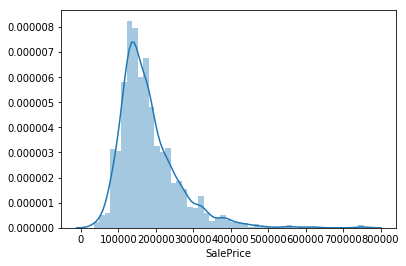

In [8]:
# check saleprice(target value)
sns.distplot(train['SalePrice']) # y axis: normalization

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,12.247699
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,12.109016
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,12.317171
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,11.849405
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,12.429220


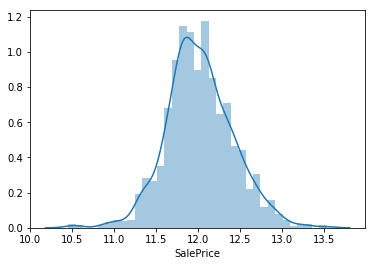

In [9]:
train["SalePrice"] = np.log1p(train["SalePrice"])
sns.distplot(train['SalePrice'])
train.head()

training 모델을 위해 value 저장

In [10]:
ntrain = train.shape[0] # number of training
ntest = test.shape[0] # number of test
y_train = train.SalePrice.values # value of saleprice

In [11]:
# concat train/test data
all_data = pd.concat((train,test)).reset_index(drop=True)
all_data.drop(['SalePrice'], axis=1, inplace=True)
all_data.shape

C:\Users\user\Anaconda3\envs\kaggle\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  


(2919, 79)

In [12]:
# check null values
all_na = (all_data.isnull().sum() / len(all_data)) * 100
all_na = all_na.drop(all_na[all_na==0].index).sort_values(ascending=False)[:30]
missing_data = pd.DataFrame({'Missing Ratio':all_na})
missing_data.head(20)

,Missing Ratio
PoolQC,99.657417
MiscFeature,96.402878
Alley,93.216855
Fence,80.438506
FireplaceQu,48.646797
LotFrontage,16.649538
GarageQual,5.447071
GarageCond,5.447071
GarageFinish,5.447071
GarageYrBlt,5.447071


Text(0.5, 1.0, 'Percent missing data by feature')

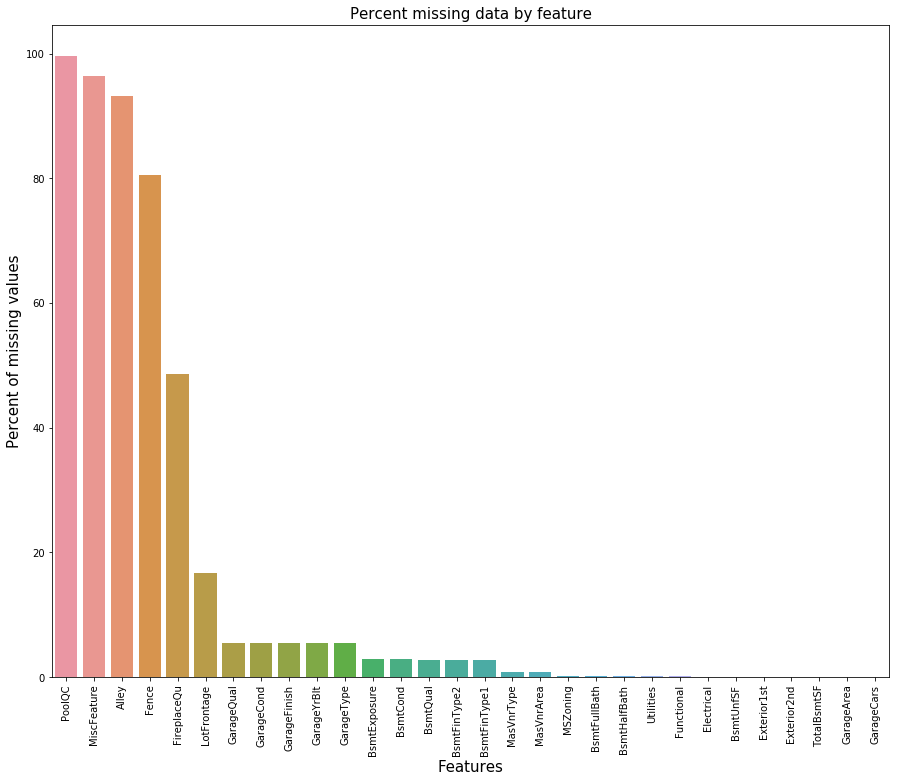

In [13]:
f, ax = plt.subplots(figsize=(15,12))
plt.xticks(rotation='90')
sns.barplot(x=all_na.index, y=all_na)
plt.xlabel('Features', fontsize=15)
plt.ylabel('Percent of missing values', fontsize=15)
plt.title('Percent missing data by feature', fontsize=15)

# Features Tuning

## 2-1. PoolQC

In [14]:
# according to dic, NaN value of the pool means no pool in the house
all_data["PoolQC"].value_counts()

Gd    4
Ex    4
Fa    2
Name: PoolQC, dtype: int64

In [15]:
all_data["PoolQC"] = all_data["PoolQC"].fillna("None")

In [16]:
all_data["PoolQC"].value_counts()

None    2909
Gd         4
Ex         4
Fa         2
Name: PoolQC, dtype: int64

## 2-2. MiscFeature

In [17]:
# according to dic, Nan value of the Miscfeature means no Miscellaneous feature in the house
all_data["MiscFeature"].value_counts()

Shed    95
Gar2     5
Othr     4
TenC     1
Name: MiscFeature, dtype: int64

In [18]:
all_data["MiscFeature"] = all_data["MiscFeature"].fillna("None")

In [19]:
all_data["MiscFeature"].value_counts()

None    2814
Shed      95
Gar2       5
Othr       4
TenC       1
Name: MiscFeature, dtype: int64

## 2-3. Alley

In [20]:
# according to dic, Nan value of the Alley means no Alley access in the house
all_data["Alley"].value_counts()

Grvl    120
Pave     78
Name: Alley, dtype: int64

In [21]:
all_data["Alley"] = all_data["Alley"].fillna("None")

In [22]:
all_data["Alley"].value_counts()

None    2721
Grvl     120
Pave      78
Name: Alley, dtype: int64

## 2-4. Fence

In [23]:
# according to dic, Nan value of the Fence means no Fence in the house
all_data["Fence"].value_counts()

MnPrv    329
GdPrv    118
GdWo     112
MnWw      12
Name: Fence, dtype: int64

In [24]:
all_data["Fence"] = all_data["Fence"].fillna("None")

In [25]:
all_data["Fence"].value_counts()

None     2348
MnPrv     329
GdPrv     118
GdWo      112
MnWw       12
Name: Fence, dtype: int64

## 2-5. FireplaceQu

In [26]:
# according to dic, Nan value of the FireplaceQuality means no Fireplace in the house
all_data["FireplaceQu"].value_counts()

Gd    744
TA    592
Fa     74
Po     46
Ex     43
Name: FireplaceQu, dtype: int64

In [27]:
all_data["FireplaceQu"] = all_data["FireplaceQu"].fillna("None")
all_data["FireplaceQu"].value_counts()

None    1420
Gd       744
TA       592
Fa        74
Po        46
Ex        43
Name: FireplaceQu, dtype: int64

## 2-6. LotFrontage

In [28]:
# LotFrontage: Linear feet of street connected to property
# fill with medium of neighborhood's LotFrontage
all_data["LotFrontage"].describe()

count    2433.000000
mean       69.305795
std        23.344905
min        21.000000
25%        59.000000
50%        68.000000
75%        80.000000
max       313.000000
Name: LotFrontage, dtype: float64

In [29]:
all_data["LotFrontage"].fillna(all_data.groupby("Neighborhood")["LotFrontage"].transform("median"), inplace=True)

In [30]:
all_data[["Neighborhood", "LotFrontage"]].head(30)

,Neighborhood,LotFrontage
0,CollgCr,65.0
1,Veenker,80.0
2,CollgCr,68.0
3,Crawfor,60.0
4,NoRidge,84.0
5,Mitchel,85.0
6,Somerst,75.0
7,NWAmes,80.0
8,OldTown,51.0
9,BrkSide,50.0


## 2-7. GarageYrBlt, GarageType, GarageCars, GarageArea, GarageQual, GarageCond, GarageFinish

In [31]:
# GarageYrBlt: Year garage was built
all_data[['GarageYrBlt','GarageType','GarageCars','GarageArea','GarageQual','GarageCond','GarageFinish']].head()

,GarageYrBlt,GarageType,GarageCars,GarageArea,GarageQual,GarageCond,GarageFinish
0,2003.0,Attchd,2.0,548.0,TA,TA,RFn
1,1976.0,Attchd,2.0,460.0,TA,TA,RFn
2,2001.0,Attchd,2.0,608.0,TA,TA,RFn
3,1998.0,Detchd,3.0,642.0,TA,TA,Unf
4,2000.0,Attchd,3.0,836.0,TA,TA,RFn


In [32]:
all_data["GarageYrBlt"] = all_data["GarageYrBlt"].fillna("None")
all_data["GarageType"] = all_data["GarageType"].fillna("None")
all_data["GarageQual"] = all_data["GarageQual"].fillna("None")
all_data["GarageCond"] = all_data["GarageCond"].fillna("None")
all_data["GarageFinish"] = all_data["GarageFinish"].fillna("None")
all_data["GarageCars"] = all_data["GarageCars"].fillna(0)
all_data["GarageArea"] = all_data["GarageArea"].fillna(0)

In [33]:
all_data[['GarageYrBlt','GarageType','GarageCars','GarageArea','GarageQual','GarageCond','GarageFinish']].head()

,GarageYrBlt,GarageType,GarageCars,GarageArea,GarageQual,GarageCond,GarageFinish
0,2003,Attchd,2.0,548.0,TA,TA,RFn
1,1976,Attchd,2.0,460.0,TA,TA,RFn
2,2001,Attchd,2.0,608.0,TA,TA,RFn
3,1998,Detchd,3.0,642.0,TA,TA,Unf
4,2000,Attchd,3.0,836.0,TA,TA,RFn


## 2-8. BsmtFinType2, BsmtExposure, BsmtFinType1, BsmtCond, BsmtQual, BsmtFullBath, BsmtHalfBath,TotalBsmtSF, BsmtFinSF1,BsmtFinSF2,BsmtUnfSF

In [34]:
# Bsmt = basement
# check null values..
all_data[['BsmtFinType2','BsmtExposure','BsmtFinType1','BsmtCond','BsmtQual','BsmtFullBath','BsmtHalfBath','TotalBsmtSF','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF']].head(20)

# if one col is null, all of these columns are null

,BsmtFinType2,BsmtExposure,BsmtFinType1,BsmtCond,BsmtQual,BsmtFullBath,BsmtHalfBath,TotalBsmtSF,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF
0,Unf,No,GLQ,TA,Gd,1.0,0.0,856.0,706.0,0.0,150.0
1,Unf,Gd,ALQ,TA,Gd,0.0,1.0,1262.0,978.0,0.0,284.0
2,Unf,Mn,GLQ,TA,Gd,1.0,0.0,920.0,486.0,0.0,434.0
3,Unf,No,ALQ,Gd,TA,1.0,0.0,756.0,216.0,0.0,540.0
4,Unf,Av,GLQ,TA,Gd,1.0,0.0,1145.0,655.0,0.0,490.0
5,Unf,No,GLQ,TA,Gd,1.0,0.0,796.0,732.0,0.0,64.0
6,Unf,Av,GLQ,TA,Ex,1.0,0.0,1686.0,1369.0,0.0,317.0
7,BLQ,Mn,ALQ,TA,Gd,1.0,0.0,1107.0,859.0,32.0,216.0
8,Unf,No,Unf,TA,TA,0.0,0.0,952.0,0.0,0.0,952.0
9,Unf,No,GLQ,TA,TA,1.0,0.0,991.0,851.0,0.0,140.0


In [35]:
all_data['BsmtFinType2'] = all_data['BsmtFinType2'].fillna("None")
all_data['BsmtExposure'] = all_data['BsmtExposure'].fillna("None")
all_data['BsmtFinType1'] = all_data['BsmtFinType1'].fillna("None")
all_data['BsmtCond'] = all_data['BsmtCond'].fillna("None")
all_data['BsmtQual'] = all_data['BsmtQual'].fillna("None")
all_data['BsmtFullBath'] = all_data['BsmtFullBath'].fillna(0)
all_data['BsmtHalfBath'] = all_data['BsmtHalfBath'].fillna(0)
all_data['TotalBsmtSF'] = all_data['TotalBsmtSF'].fillna(0)
all_data['BsmtFinSF1'] = all_data['BsmtFinSF1'].fillna(0)
all_data['BsmtFinSF2'] = all_data['BsmtFinSF2'].fillna(0)
all_data['BsmtUnfSF'] = all_data['BsmtUnfSF'].fillna(0)

In [36]:
all_data[['BsmtFinType2','BsmtExposure','BsmtFinType1','BsmtCond','BsmtQual','BsmtFullBath','BsmtHalfBath','TotalBsmtSF']].head(20) 

,BsmtFinType2,BsmtExposure,BsmtFinType1,BsmtCond,BsmtQual,BsmtFullBath,BsmtHalfBath,TotalBsmtSF
0,Unf,No,GLQ,TA,Gd,1.0,0.0,856.0
1,Unf,Gd,ALQ,TA,Gd,0.0,1.0,1262.0
2,Unf,Mn,GLQ,TA,Gd,1.0,0.0,920.0
3,Unf,No,ALQ,Gd,TA,1.0,0.0,756.0
4,Unf,Av,GLQ,TA,Gd,1.0,0.0,1145.0
5,Unf,No,GLQ,TA,Gd,1.0,0.0,796.0
6,Unf,Av,GLQ,TA,Ex,1.0,0.0,1686.0
7,BLQ,Mn,ALQ,TA,Gd,1.0,0.0,1107.0
8,Unf,No,Unf,TA,TA,0.0,0.0,952.0
9,Unf,No,GLQ,TA,TA,1.0,0.0,991.0


## 2-9. MasVnrArea, MasVnrType

In [37]:
# 0 MasVnrArea means no Masonry veneer
all_data['MasVnrArea'] = all_data['MasVnrArea'].fillna(0)
all_data['MasVnrType'] = all_data['MasVnrType'].fillna("None")

In [38]:
all_data['MasVnrArea'].value_counts()

0.0       1761
120.0       15
176.0       13
200.0       13
216.0       12
180.0       12
144.0       11
72.0        11
108.0       11
16.0        11
340.0       10
80.0         9
210.0        9
128.0        9
196.0        9
256.0        8
178.0        8
40.0         8
302.0        8
170.0        8
132.0        8
260.0        7
300.0        7
203.0        7
186.0        7
456.0        7
420.0        7
50.0         7
252.0        7
106.0        7
          ... 
81.0         1
528.0        1
91.0         1
87.0         1
97.0         1
63.0         1
408.0        1
47.0         1
39.0         1
118.0        1
1170.0       1
376.0        1
584.0        1
322.0        1
634.0        1
532.0        1
1290.0       1
519.0        1
287.0        1
571.0        1
435.0        1
886.0        1
237.0        1
738.0        1
1050.0       1
664.0        1
247.0        1
550.0        1
137.0        1
572.0        1
Name: MasVnrArea, Length: 444, dtype: int64

In [39]:
all_data['MasVnrType'].value_counts()

None       1766
BrkFace     879
Stone       249
BrkCmn       25
Name: MasVnrType, dtype: int64

## 2-10. Electrical

In [40]:
# only one null value of electrical so..
print(all_data['Electrical'].isnull().sum())

all_data['Electrical'].value_counts()
# Sbrkr is most frequent value so we fill null as SBrkr

1


SBrkr    2671
FuseA     188
FuseF      50
FuseP       8
Mix         1
Name: Electrical, dtype: int64

In [41]:
all_data['Electrical'] = all_data['Electrical'].fillna('SBrkr')

In [42]:
all_data['Electrical'].value_counts()

SBrkr    2672
FuseA     188
FuseF      50
FuseP       8
Mix         1
Name: Electrical, dtype: int64

## 2-11. MSZoning

In [43]:
all_data['MSZoning'].value_counts()

RL         2265
RM          460
FV          139
RH           26
C (all)      25
Name: MSZoning, dtype: int64

In [44]:
# only 4 null value of MSZoning ...
print(all_data['MSZoning'].isnull().sum())

# fill Nan with RL which is most frequent value
all_data['MSZoning'] = all_data['MSZoning'].fillna('RL')

4


In [45]:
all_data['MSZoning'].value_counts()

RL         2269
RM          460
FV          139
RH           26
C (all)      25
Name: MSZoning, dtype: int64

## 2-12. Utilities

In [46]:
all_data['Utilities'].value_counts(dropna=False)

AllPub    2916
NaN          2
NoSeWa       1
Name: Utilities, dtype: int64

In [47]:
# fill Nan with Allpub which is most frequent value
all_data['Utilities'] = all_data['Utilities'].fillna('AllPub')

In [48]:
all_data['Utilities'].value_counts()

AllPub    2918
NoSeWa       1
Name: Utilities, dtype: int64

## 2-13. Functional

In [49]:
all_data['Functional'].value_counts(dropna=False)

Typ     2717
Min2      70
Min1      65
Mod       35
Maj1      19
Maj2       9
Sev        2
NaN        2
Name: Functional, dtype: int64

In [50]:
# fill Nan with Typ which is most frequent value
all_data['Functional'] = all_data['Functional'].fillna('Typ')

In [51]:
all_data['Functional'].value_counts()

Typ     2719
Min2      70
Min1      65
Mod       35
Maj1      19
Maj2       9
Sev        2
Name: Functional, dtype: int64

## 2-14. SaleType

In [52]:
all_data['SaleType'].value_counts(dropna=False)

WD       2525
New       239
COD        87
ConLD      26
CWD        12
ConLI       9
ConLw       8
Oth         7
Con         5
NaN         1
Name: SaleType, dtype: int64

In [53]:
# fill Nan with WD which is most frequent value
all_data['SaleType'] = all_data['SaleType'].fillna('WD')

## 2-15. KitchenQual

In [54]:
all_data['KitchenQual'].value_counts(dropna=False)

TA     1492
Gd     1151
Ex      205
Fa       70
NaN       1
Name: KitchenQual, dtype: int64

In [55]:
all_data['KitchenQual'] = all_data['KitchenQual'].fillna("TA")

## 2-16. Exterior1st and Exterior 2nd

In [56]:
all_data['Exterior1st'].value_counts(dropna=False)

VinylSd    1025
MetalSd     450
HdBoard     442
Wd Sdng     411
Plywood     221
CemntBd     126
BrkFace      87
WdShing      56
AsbShng      44
Stucco       43
BrkComm       6
Stone         2
CBlock        2
AsphShn       2
ImStucc       1
NaN           1
Name: Exterior1st, dtype: int64

In [57]:
all_data['Exterior1st'] = all_data['Exterior1st'].fillna('VinylSd')

In [58]:
# mode : 최빈값
all_data['Exterior1st'].mode()[0] # --> Vinylsd

# 위 셀과 같은 코드
# all_data['Exterior1st'] = all_data['Exterior1st'].fillna(all_data['Exterior1st'].mode()[0])

'VinylSd'

In [59]:
all_data['Exterior2nd'].value_counts(dropna=False)

VinylSd    1014
MetalSd     447
HdBoard     406
Wd Sdng     391
Plywood     270
CmentBd     126
Wd Shng      81
BrkFace      47
Stucco       47
AsbShng      38
Brk Cmn      22
ImStucc      15
Stone         6
AsphShn       4
CBlock        3
Other         1
NaN           1
Name: Exterior2nd, dtype: int64

In [60]:
all_data['Exterior2nd'] = all_data['Exterior2nd'].fillna(all_data['Exterior2nd'].mode()[0])

In [61]:
all_data['Exterior2nd'].value_counts()

VinylSd    1015
MetalSd     447
HdBoard     406
Wd Sdng     391
Plywood     270
CmentBd     126
Wd Shng      81
Stucco       47
BrkFace      47
AsbShng      38
Brk Cmn      22
ImStucc      15
Stone         6
AsphShn       4
CBlock        3
Other         1
Name: Exterior2nd, dtype: int64

## 2-17. Check every features

In [62]:
# check null values
all_na = (all_data.isnull().sum() / len(all_data))*100
all_na = all_na.drop(all_na[all_na==0].index).sort_values(ascending=False)[:30]
missing_data = pd.DataFrame({'Missing Ratio':all_na})
missing_data.head(20)


,Missing Ratio


이제 Nan 값을 모두 처리했다.

# 3. More Feature Tuning

In [63]:
all_data.head(10)

,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,...,SaleType,ScreenPorch,Street,TotRmsAbvGrd,TotalBsmtSF,Utilities,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold
0,856,854,0,None,3,1Fam,TA,No,706.0,0.0,...,WD,0,Pave,8,856.0,AllPub,0,2003,2003,2008
1,1262,0,0,None,3,1Fam,TA,Gd,978.0,0.0,...,WD,0,Pave,6,1262.0,AllPub,298,1976,1976,2007
2,920,866,0,None,3,1Fam,TA,Mn,486.0,0.0,...,WD,0,Pave,6,920.0,AllPub,0,2001,2002,2008
3,961,756,0,None,3,1Fam,Gd,No,216.0,0.0,...,WD,0,Pave,7,756.0,AllPub,0,1915,1970,2006
4,1145,1053,0,None,4,1Fam,TA,Av,655.0,0.0,...,WD,0,Pave,9,1145.0,AllPub,192,2000,2000,2008
5,796,566,320,None,1,1Fam,TA,No,732.0,0.0,...,WD,0,Pave,5,796.0,AllPub,40,1993,1995,2009
6,1694,0,0,None,3,1Fam,TA,Av,1369.0,0.0,...,WD,0,Pave,7,1686.0,AllPub,255,2004,2005,2007
7,1107,983,0,None,3,1Fam,TA,Mn,859.0,32.0,...,WD,0,Pave,7,1107.0,AllPub,235,1973,1973,2009
8,1022,752,0,None,2,1Fam,TA,No,0.0,0.0,...,WD,0,Pave,8,952.0,AllPub,90,1931,1950,2008
9,1077,0,0,None,2,2fmCon,TA,No,851.0,0.0,...,WD,0,Pave,5,991.0,AllPub,0,1939,1950,2008


In [64]:
all_data.describe() # we will deal with scale soon

,1stFlrSF,2ndFlrSF,3SsnPorch,BedroomAbvGr,BsmtFinSF1,BsmtFinSF2,BsmtFullBath,BsmtHalfBath,BsmtUnfSF,EnclosedPorch,...,OverallCond,OverallQual,PoolArea,ScreenPorch,TotRmsAbvGrd,TotalBsmtSF,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold
count,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,...,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000
mean,1159.581706,336.483727,2.602261,2.860226,441.272011,49.565262,0.429599,0.061322,560.579993,23.098321,...,5.564577,6.089072,2.251799,16.062350,6.451524,1051.417266,93.709832,1971.312778,1984.264474,2007.792737
std,392.362079,428.701456,25.188169,0.822693,455.606014,169.179104,0.524676,0.245608,439.590889,64.244246,...,1.113131,1.409947,35.663946,56.184365,1.569379,441.120498,126.526589,30.291442,20.894344,1.314964
min,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000,1872.000000,1950.000000,2006.000000
25%,876.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,220.000000,0.000000,...,5.000000,5.000000,0.000000,0.000000,5.000000,793.000000,0.000000,1953.500000,1965.000000,2007.000000
50%,1082.000000,0.000000,0.000000,3.000000,368.000000,0.000000,0.000000,0.000000,467.000000,0.000000,...,5.000000,6.000000,0.000000,0.000000,6.000000,989.000000,0.000000,1973.000000,1993.000000,2008.000000
75%,1387.500000,704.000000,0.000000,3.000000,733.000000,0.000000,1.000000,0.000000,805.000000,0.000000,...,6.000000,7.000000,0.000000,0.000000,7.000000,1302.000000,168.000000,2001.000000,2004.000000,2009.000000
max,5095.000000,2065.000000,508.000000,8.000000,5644.000000,1526.000000,3.000000,2.000000,2336.000000,1012.000000,...,9.000000,10.000000,800.000000,576.000000,15.000000,6110.000000,1424.000000,2010.000000,2010.000000,2010.000000


## 3-1. Add/Drop more features

In [65]:
all_data['Utilities'].value_counts()

AllPub    2918
NoSeWa       1
Name: Utilities, dtype: int64

Since Utilites feature have almost same value, so we better remove it

In [66]:
all_data.drop('Utilities', axis=1, inplace=True)

## Check Correlation
상관분석

In [67]:
# 각 feature 들 사이에서 어떤 상관관계를 갖는지 계산 후 
# SalePrice 와의 관계만 내림차순 정렬 후 출력
corr = train.corr(method='pearson').drop(['SalePrice'])\
        .sort_values('SalePrice', ascending=False)['SalePrice']
corr

OverallQual      0.817185
GrLivArea        0.700927
GarageCars       0.680625
GarageArea       0.650888
TotalBsmtSF      0.612134
1stFlrSF         0.596981
FullBath         0.594771
YearBuilt        0.586570
YearRemodAdd     0.565608
GarageYrBlt      0.541073
TotRmsAbvGrd     0.534422
Fireplaces       0.489450
MasVnrArea       0.430809
BsmtFinSF1       0.372023
LotFrontage      0.355879
WoodDeckSF       0.334135
OpenPorchSF      0.321053
2ndFlrSF         0.319300
HalfBath         0.313982
LotArea          0.257320
BsmtFullBath     0.236224
BsmtUnfSF        0.221985
BedroomAbvGr     0.209043
ScreenPorch      0.121208
PoolArea         0.069798
MoSold           0.057330
3SsnPorch        0.054900
BsmtFinSF2       0.004832
BsmtHalfBath    -0.005149
MiscVal         -0.020021
OverallCond     -0.036868
YrSold          -0.037263
LowQualFinSF    -0.037963
MSSubClass      -0.073959
KitchenAbvGr    -0.147548
EnclosedPorch   -0.149050
Name: SalePrice, dtype: float64

correlation 값이 -0.1~0.1 인 feature 들은 지우는게 나을 듯 하다.<br>

In [68]:
all_data.head()

,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,...,SaleCondition,SaleType,ScreenPorch,Street,TotRmsAbvGrd,TotalBsmtSF,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold
0,856,854,0,None,3,1Fam,TA,No,706.0,0.0,...,Normal,WD,0,Pave,8,856.0,0,2003,2003,2008
1,1262,0,0,None,3,1Fam,TA,Gd,978.0,0.0,...,Normal,WD,0,Pave,6,1262.0,298,1976,1976,2007
2,920,866,0,None,3,1Fam,TA,Mn,486.0,0.0,...,Normal,WD,0,Pave,6,920.0,0,2001,2002,2008
3,961,756,0,None,3,1Fam,Gd,No,216.0,0.0,...,Abnorml,WD,0,Pave,7,756.0,0,1915,1970,2006
4,1145,1053,0,None,4,1Fam,TA,Av,655.0,0.0,...,Normal,WD,0,Pave,9,1145.0,192,2000,2000,2008


In [69]:
all_data.drop('PoolArea', axis=1, inplace=True)
all_data.drop('MoSold', axis=1, inplace=True)
all_data.drop('3SsnPorch', axis=1, inplace=True)
all_data.drop('BsmtFinSF2', axis=1, inplace=True)
all_data.drop('BsmtHalfBath', axis=1, inplace=True)
all_data.drop('MiscVal', axis=1, inplace=True)
all_data.drop('LowQualFinSF', axis=1, inplace=True)
all_data.drop('YrSold', axis=1, inplace=True)
all_data.drop('OverallCond', axis=1, inplace=True)
all_data.drop('MSSubClass', axis=1, inplace=True)

In [70]:
all_data.shape # deleted 10 cols

(2919, 68)

In [71]:
from sklearn.preprocessing import LabelEncoder
from scipy import stats
from scipy.stats import norm, skew

In [72]:
# get the numeric values
numeric_features = all_data.dtypes[all_data.dtypes != 'object'].index
numeric_features.size

25

In [73]:
# check the skew of all numerical features
skewed_feats = all_data[numeric_features].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
print('\nSkew in numerical features: \n')
skewness = pd.DataFrame({'Skew':skewed_feats})
skewness


Skew in numerical features: 



,Skew
LotArea,12.822431
KitchenAbvGr,4.302254
EnclosedPorch,4.003891
ScreenPorch,3.946694
MasVnrArea,2.613592
OpenPorchSF,2.535114
WoodDeckSF,1.842433
LotFrontage,1.505704
1stFlrSF,1.469604
BsmtFinSF1,1.425230


In [74]:
# sns.barplot(x=all_data['LotArea'], y=all_data['LotArea'])

In [75]:
# sns.barplot(x=all_data['YearBuilt'], y=all_data['YearBuilt'])

In [76]:
# sns.barplot(x=all_data['FullBath'], y=all_data['FullBath'])

In [77]:
skewness = skewness[abs(skewness)>0.5]
all_data[skewness.index] = np.log1p(all_data[skewness.index])

In [78]:
# check the skew of all numerical features
skewed_feats = all_data[numeric_features].apply(lambda x:skew(x.dropna())).sort_values(ascending=False)
print('\nSkew in numerical features: \n')
skewness = pd.DataFrame({'Skew':skewed_feats})
skewness


Skew in numerical features: 



,Skew
KitchenAbvGr,3.520351
ScreenPorch,2.945905
EnclosedPorch,1.961081
HalfBath,0.580692
MasVnrArea,0.537018
BsmtFullBath,0.425167
2ndFlrSF,0.305049
Fireplaces,0.237587
WoodDeckSF,0.158033
1stFlrSF,0.064828


scaling 이 필요하다면, minmax scaler 사용 가능.

In [79]:
# from sklearn.preprocessing import minmax_scale

# df['col_name'] = minmax_scale(df['col_name'], axis=0, copy=True)

## 3-3. categorial to num, num to categorial
  
Transforming some numerical variables to categorical  
Usually, categorical data has no order

In [80]:
all_data.head()

,1stFlrSF,2ndFlrSF,Alley,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinType1,BsmtFinType2,...,RoofStyle,SaleCondition,SaleType,ScreenPorch,Street,TotRmsAbvGrd,TotalBsmtSF,WoodDeckSF,YearBuilt,YearRemodAdd
0,6.753438,6.751101,None,1.386294,1Fam,TA,No,6.561031,GLQ,Unf,...,Gable,Normal,WD,0.0,Pave,2.197225,6.753438,0.000000,7.602900,7.602900
1,7.141245,0.000000,None,1.386294,1Fam,TA,Gd,6.886532,ALQ,Unf,...,Gable,Normal,WD,0.0,Pave,1.945910,7.141245,5.700444,7.589336,7.589336
2,6.825460,6.765039,None,1.386294,1Fam,TA,Mn,6.188264,GLQ,Unf,...,Gable,Normal,WD,0.0,Pave,1.945910,6.825460,0.000000,7.601902,7.602401
3,6.869014,6.629363,None,1.386294,1Fam,Gd,No,5.379897,ALQ,Unf,...,Gable,Abnorml,WD,0.0,Pave,2.079442,6.629363,0.000000,7.557995,7.586296
4,7.044033,6.960348,None,1.609438,1Fam,TA,Av,6.486161,GLQ,Unf,...,Gable,Normal,WD,0.0,Pave,2.302585,7.044033,5.262690,7.601402,7.601402


In [81]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2919 entries, 0 to 2918
Data columns (total 68 columns):
1stFlrSF         2919 non-null float64
2ndFlrSF         2919 non-null float64
Alley            2919 non-null object
BedroomAbvGr     2919 non-null float64
BldgType         2919 non-null object
BsmtCond         2919 non-null object
BsmtExposure     2919 non-null object
BsmtFinSF1       2919 non-null float64
BsmtFinType1     2919 non-null object
BsmtFinType2     2919 non-null object
BsmtFullBath     2919 non-null float64
BsmtQual         2919 non-null object
BsmtUnfSF        2919 non-null float64
CentralAir       2919 non-null object
Condition1       2919 non-null object
Condition2       2919 non-null object
Electrical       2919 non-null object
EnclosedPorch    2919 non-null float64
ExterCond        2919 non-null object
ExterQual        2919 non-null object
Exterior1st      2919 non-null object
Exterior2nd      2919 non-null object
Fence            2919 non-null object
FireplaceQu 

Label Encoding some categorical variables that may contain information in their ordering set

In [82]:
from sklearn.preprocessing import LabelEncoder
cols = ('FireplaceQu', 'BsmtQual', 'BsmtCond', 'GarageQual', 'GarageCond', 
        'ExterQual', 'ExterCond','HeatingQC', 'PoolQC', 'KitchenQual', 'BsmtFinType1', 
        'BsmtFinType2', 'Functional', 'Fence', 'BsmtExposure', 'GarageFinish', 'LandSlope',
        'LotShape', 'PavedDrive', 'Street', 'Alley', 'CentralAir')

# process columns, apply LabelEncoder to categorical features
for c in cols:
    lbl = LabelEncoder()
    lbl.fit(list(all_data[c].values))
    all_data[c] = lbl.transform(list(all_data[c].values))
    
# shape
all_data.shape


(2919, 68)

In [83]:
all_data.head()

,1stFlrSF,2ndFlrSF,Alley,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinType1,BsmtFinType2,...,RoofStyle,SaleCondition,SaleType,ScreenPorch,Street,TotRmsAbvGrd,TotalBsmtSF,WoodDeckSF,YearBuilt,YearRemodAdd
0,6.753438,6.751101,1,1.386294,1Fam,4,3,6.561031,2,6,...,Gable,Normal,WD,0.0,1,2.197225,6.753438,0.000000,7.602900,7.602900
1,7.141245,0.000000,1,1.386294,1Fam,4,1,6.886532,0,6,...,Gable,Normal,WD,0.0,1,1.945910,7.141245,5.700444,7.589336,7.589336
2,6.825460,6.765039,1,1.386294,1Fam,4,2,6.188264,2,6,...,Gable,Normal,WD,0.0,1,1.945910,6.825460,0.000000,7.601902,7.602401
3,6.869014,6.629363,1,1.386294,1Fam,1,3,5.379897,0,6,...,Gable,Abnorml,WD,0.0,1,2.079442,6.629363,0.000000,7.557995,7.586296
4,7.044033,6.960348,1,1.609438,1Fam,4,0,6.486161,2,6,...,Gable,Normal,WD,0.0,1,2.302585,7.044033,5.262690,7.601402,7.601402


The danger in label encoding is that your machine learning algorithm may learn to favor a over b.

The common solution for encoding nominal data is one-hot encoding.(dummy val)


In [84]:
all_data = pd.get_dummies(all_data)
print(all_data.shape)

(2919, 313)


In [85]:
all_data.head()

,1stFlrSF,2ndFlrSF,Alley,BedroomAbvGr,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinType1,BsmtFinType2,BsmtFullBath,...,SaleCondition_Partial,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD
0,6.753438,6.751101,1,1.386294,4,3,6.561031,2,6,0.693147,...,0,0,0,0,0,0,0,0,0,1
1,7.141245,0.000000,1,1.386294,4,1,6.886532,0,6,0.000000,...,0,0,0,0,0,0,0,0,0,1
2,6.825460,6.765039,1,1.386294,4,2,6.188264,2,6,0.693147,...,0,0,0,0,0,0,0,0,0,1
3,6.869014,6.629363,1,1.386294,1,3,5.379897,0,6,0.693147,...,0,0,0,0,0,0,0,0,0,1
4,7.044033,6.960348,1,1.609438,4,0,6.486161,2,6,0.693147,...,0,0,0,0,0,0,0,0,0,1


split train/test set

In [86]:
train = all_data[:ntrain]
test = all_data[ntrain:]

In [87]:
print(all_data.shape)
print(train.shape)
print(test.shape)

(2919, 313)
(1460, 313)
(1459, 313)


# Modeling

In [88]:
from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LassoLarsIC
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
from xgboost import XGBRegressor
import xgboost as xgb
import lightgbm as lgb
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
from sklearn.model_selection import GridSearchCV

**<u>Setting for K-fold cross validation</u>**  
Since this is not classification, we can not use accuracy for scoring.  
So, we have to use RMSE to check acuracy of the model

In [89]:
# Validation function
n_folds = 10

def rmsle_cv(model):
    kf = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(train.values)
    rmse = np.sqrt(-cross_val_score(model, train.values, y_train, scoring='neg_mean_squared_error', cv=kf))
    return(rmse)

This model may be very sensitive to outliers. So we need to made it more robust on them. For that we use the sklearn's Robustscaler() method on pipeline

*Robust: 중앙값(median)과 IQR(interquartile range) 사용. 아웃라이어의 영향을 최소화

**LASSO Regression**

In [90]:
lasso = make_pipeline(RobustScaler(), Lasso(alpha=0.0005, random_state=3))

**Elastic Net Regression**

In [91]:
ENet = make_pipeline(RobustScaler(), ElasticNet(alpha=0.005, l1_ratio=.9, random_state=3))

**Kernel Ridge Regression**

In [92]:
KRR = KernelRidge(alpha=0.6, kernel='polynomial', degree=2, coef0=2.5)
#kernel = 'rbf', 'sigmoid'

**Gradient Boosting Regression**  

With huber loss that makes it robust to outlier

In [93]:
GBoost = GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05,
                                  max_depth=4, max_features='sqrt',
                                  min_samples_leaf=15, min_samples_split=10,
                                  loss='huber', random_state=5)

**XGBoost**

In [116]:
model_xgb = xgb.XGBRegressor(colsample_bytree=0.4603, gamma=0.4608,
                             learning_rate=0.05, max_depth=3,
                             min_child_weight=1.7817, n_estimators=2200,
                             reg_alpha=0.4640, reg_lambda=0.8571,
                             subsample=0.5213, silent=1,
                             random_state=7, nthread=-1)

you can do grid search like this. Note run you need enough computing power  
(GPU 없으면 엄청 오래걸림)

In [94]:
# A parameter grid for XGBoost
# params = {'min_child_weight':[i/10.0 for i in range(5,18)], 'gamma':[i/100.0 for i in range(3,6)],  
# 'subsample':[i/10.0 for i in range(4,9)], 'colsample_bytree':[i/10.0 for i in range(4,8)], 'max_depth': [2,3,4]}

# Initialize XGB and GridSearch
# xgb = XGBRegressor(nthread=-1) 

# grid = GridSearchCV(xgb, params)
# grid.fit(train, y_train)

**LightGBM**

In [95]:
model_lgb = lgb.LGBMRegressor(objective='regression', num_leaves=5,
                             learning_rate=0.05, n_estimators=720,
                             max_bin=55, bagging_fraction=0.8,
                             bagging_freq=5, feature_fraction=0.2319,
                             feature_fraction_seed=9, bagging_seed=9,
                             min_data_in_leaf=6, min_sum_hesssian_in_leaf=11)

**Support Vector Regressor**

In [96]:
model_svr = SVR(C=1, cache_size=200, coef0=0, degree=3, epsilon=0.0, gamma='auto',
               kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

**__Grid search for SVR**

In [97]:
# params = {'gamma': [i/100.0 for i in range(0,11)],
#           'coef0': [0, 0.1, 0.5, 1],
#           'C': [0.1, 0.2, 0.5, 1],
#           'epsilon': [i/10.0 for i in range(0,6)]}

params = {'coef0': [0, 0.1, 0.5, 1],
          'C': [0.1, 0.2, 0.5, 1],
          'epsilon': [i/10.0 for i in range(0,6)]}

# model_svr = SVR()
# grid_search = GridSearchCV(model_svr, params, cv=10, scoring='neg_mean_squared_error')
# grid_search.fit(train, y_train)

In [98]:
# grid_search.best_estimator_

**Random Forest Regressor**

In [99]:
regr = RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                             max_features=150, max_leaf_nodes=None,
                             min_impurity_decrease=0.0, min_impurity_split=None,
                             min_samples_leaf=1, min_samples_split=2,
                             min_weight_fraction_leaf=0.0, n_estimators=90, n_jobs=1,
                             oob_score=False, random_state=None, verbose=0, warm_start=False)

**__Grid search for RF**

In [100]:
param_grid = [{'n_estimators': [3, 10, 30, 60, 90],
               'max_features': [50,100,150,200,250,300]},
              {'bootstrap': [True],
               'n_estimators': [3, 10, 30, 60, 90],
               'max_features': [50, 100, 150, 200, 250]},]

## Model scores

**lasso scores**

In [104]:
score = rmsle_cv(lasso)
print('Lasso score: {:.4f} ({:.4f})\n'.format(score.mean(), score.std()))

Lasso score: 0.1277 (0.0195)



**Elastic Net Regression scores**

In [105]:
score = rmsle_cv(ENet)
print('ElasticNet score: {:.4f} ({:.4f})\n'.format(score.mean(), score.std()))

ElasticNet score: 0.1404 (0.0199)



**Kernel Ridge Regression scores**

In [106]:
score = rmsle_cv(KRR)
print('Kernel Ridge score: {:.4f} ({:.4f})\n'.format(score.mean(), score.std()))

Kernel Ridge score: 0.1324 (0.0209)



**Gradient Boosting Regression scores**

In [107]:
score = rmsle_cv(GBoost)

In [108]:
print('Gradient Boosting score: {:.4f} ({:.4f})\n'.format(score.mean(), score.std()))

Gradient Boosting score: 0.1276 (0.0195)



**XGBoost scores**

In [117]:
score = rmsle_cv(model_xgb)
print('Xgboost score: {:.4f} ({:.4f})\n'.format(score.mean(), score.std()))

Xgboost score: 0.1431 (0.0168)



**LightGBM scores**

In [111]:
score = rmsle_cv(model_lgb)
print('LGBM score: {:.4f} ({:.4f})\n'.format(score.mean(), score.std()))

LGBM score: 0.1244 (0.0180)



**Support Vector Regressor**

In [112]:
score = rmsle_cv(model_svr)
print('SVR score: {:.4f} ({:.4f})\n'.format(score.mean(), score.std()))

SVR score: 0.1405 (0.0203)



**RF Regressor**

In [113]:
score = rmsle_cv(regr)
print('SVR score: {:.4f} ({:.4f})\n'.format(score.mean(), score.std()))

SVR score: 0.1402 (0.0159)



# 5. Prediction

In [114]:
# define a rmsle evaluation function

def rmsle(y, y_pred):
    return np.sqrt(mean_squared_error(y, y_pred))

**XGBoost**

In [118]:
model_xgb.fit(train, y_train)
xgb_train_pred = model_xgb.predict(train)
xgb_pred = np.expm1(model_xgb.predict(test))
print(rmsle(y_train, xgb_train_pred))

0.1256466644878397


**LightGBM**

In [124]:
model_lgb.fit(train, y_train)
lgb_train_pred = model_lgb.predict(train)
lgb_pred = np.expm1(model_lgb.predict(test.values))
print(rmsle(y_train, lgb_train_pred))

0.07596969216296838


**Gradient Boosting Regression**

In [125]:
GBoost.fit(train, y_train)
GB_train_pred = GBoost.predict(train)
GB_pred = np.expm1(GBoost.predict(test.values))
print(rmsle(y_train, GB_train_pred))

0.06277129518088131


**Elastic Net Regression**

In [127]:
ENet.fit(train, y_train)
ENet_train_pred = ENet.predict(train)
ENet_pred = np.expm1(ENet.predict(test.values))
print(rmsle(y_train, ENet_train_pred))

0.1380924760847857


**make Ensemble prediction**  
Select Xgboost, LightGBM, Gradient Boosting Regression

In [128]:
ensemble = xgb_pred*0.25 + lgb_pred*0.25 + GB_pred*0.5

## submission

In [131]:
sub = pd.DataFrame()
sub['Id'] = test_ID
sub['SalePrice'] = ensemble
sub.to_csv('submission.csv', index=False)